# Facial Expression Recognition Using CNN

Adapted from https://www.kaggle.com/code/naeemahmedhaji/facial-expression-recognition-using-cnn/notebook

Facial Expression Recognition using **Convolutional Neural Network** explores interpreting human emotions from images. This tutorial guides through dataset exploration, model building, training, and evaluation. Learn to design a convolutional neural network, train it to recognize emotions like happiness and sadness, and deploy it for real-world applications. Let's embark on this exciting journey!

In [2]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

2024-05-31 14:05:35.112744: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-31 14:05:35.116068: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-31 14:05:35.157947: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 14:05:35.977930: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
emotion_labels = list(map(str.lower, ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']))

In [4]:
batch_size  = 128
image_size = 48

train_set = keras.utils.image_dataset_from_directory('images/train',
                                              image_size = (image_size,image_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_names=emotion_labels,
                                              label_mode='categorical',
                                              shuffle=True)


test_set = keras.utils.image_dataset_from_directory('images/validation',
                                              image_size = (image_size,image_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_names=emotion_labels,
                                              label_mode='categorical',
                                              shuffle=False)

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


The `build_model` function defines the architecture of the convolutional neural network (CNN) for facial expression recognition.

- **1st Layer**: Convolutional layer with 64 filters of size (5, 5), ReLU activation, and batch normalization. MaxPooling and Dropout layers are added for regularization.

- **2nd Layer**: Convolutional layer with 128 filters of size (3, 3), ReLU activation, and batch normalization. MaxPooling and Dropout layers are added for regularization.

- **3rd Layer**: Convolutional layer with 512 filters of size (3, 3), ReLU activation, and batch normalization. MaxPooling and Dropout layers are added for regularization.

- **4th Layer**: Convolutional layer with 512 filters of size (3, 3), ReLU activation, and batch normalization. MaxPooling and Dropout layers are added for regularization.

- **Flatten Layer**: Flatten the output from the convolutional layers to be fed into the fully connected layers.

- **Fully Connected Layer 1**: Dense layer with 256 units and ReLU activation, followed by batch normalization and dropout for regularization.

- **Fully Connected Layer 2**: Dense layer with 512 units and ReLU activation, followed by batch normalization and dropout for regularization.

- **Output Layer**: Dense layer with softmax activation for multi-class classification, with the number of units equal to the number of classes in the dataset.

- **Compilation**: The model is compiled with the Adam optimizer, categorical cross-entropy loss function, and accuracy metric.

In [5]:
# Building Model
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(48, 48, 1)))
    # 1st Layer
    model.add(keras.layers.Conv2D(64, (5, 5), strides=(1, 1), padding='same', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Dropout(0.3))

    # 2nd Layer
    model.add(keras.layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Dropout(0.3))

    # 3rd layer
    model.add(keras.layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Dropout(0.3))

    # 4th layer
    model.add(keras.layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Dropout(0.3))

    # Flatten Layer
    model.add(keras.layers.Flatten())

    # Fully connected layer 1
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.3))

    # Fully connected layer 2
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.3))

    # Output layer
    model.add(keras.layers.Dense(len(emotion_labels), activation='softmax'))

    # Compiling the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

The `summary()` method is called on the built model to display a summary of its architecture, including the layers, output shapes, and the number of trainable parameters.

In [6]:
# Build the model
model = build_model()

# Print model summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │             

 Total params: 4,348,679 (16.59 MB)

 Trainable params: 4,344,711 (16.57 MB)

 Non-trainable params: 3,968 (15.50 KB)

None


The `ModelCheckpoint` callback is initialized to save the model weights during training. It monitors the validation accuracy (`val_acc`) and saves only the best model (determined by the maximum validation accuracy) to the specified file `"model.h5"`.

In [7]:
# Initialize ModelCheckpoint callback
# checkpoint = ModelCheckpoint("model.h5", monitor="val_acc", verbose=1, save_best_only=True)
# Initialize ModelCheckpoint callback
checkpoint = keras.callbacks.ModelCheckpoint("model.keras", monitor="val_acc", verbose=1, save_best_only=True)

The `EarlyStopping` callback is initialized to monitor the validation loss (`val_loss`). It stops the training process if the validation loss does not improve for a certain number of epochs (`patience`) specified by the user. The training is stopped early to prevent overfitting, and the weights of the best performing model are restored (`restore_best_weights=True`).

In [8]:
# Initialize EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

The `ReduceLROnPlateau` callback is initialized to dynamically adjust the learning rate during training based on the validation loss (`val_loss`). If the validation loss does not improve for a certain number of epochs (`patience`), the learning rate is reduced by a factor specified by the user (`factor`). This helps improve the training process and prevent the model from getting stuck in local minima.

In [9]:
# Initialize ReduceLROnPlateau callback
reduce_learningrate = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

The `callbacks_list` is a list containing the callbacks to be used during the training of the model. It includes the `EarlyStopping`, `ModelCheckpoint`, and `ReduceLROnPlateau` callbacks, which are used to monitor the validation loss, save the best model, and adjust the learning rate, respectively.


In [10]:
# List of callbacks
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

The `compile()` method is called on the model to configure the training process. It specifies the loss function, optimizer, and evaluation metrics to be used during training.

- **Loss Function**: Categorical cross-entropy is used as the loss function for multi-class classification problems.
- **Optimizer**: Adam optimizer is chosen with a learning rate of 0.001.
- **Metrics**: Accuracy is used as the evaluation metric to monitor the performance of the model during training.

In [11]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

The `fit()` method is called on the model to train it on the training data. It takes the following parameters:

- `data_gen.flow(X_train, y_train_categorical, batch_size=128)`: A generator that yields batches of augmented training data. Data augmentation is applied on-the-fly using the `ImageDataGenerator` object defined earlier.
- `validation_data=(X_val, y_val_categorical)`: Validation data to evaluate the model's performance after each epoch.
- `epochs=50`: The number of epochs to train the model.
- `verbose=1`: Specifies the verbosity mode. Here, it prints progress bars during training.

In [22]:
# Training the model
history = model.fit(train_set,
    validation_data=test_set,
    epochs=50,
    verbose=1,
    callbacks=callbacks_list
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  3/163 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.1176 - loss: 2.8916

I0000 00:00:1713277408.119192      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713277408.144369      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


118/163 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.1869 - loss: 2.4294

W0000 00:00:1713277428.664625      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.1921 - loss: 2.3750

W0000 00:00:1713277433.720732      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


163/163 ━━━━━━━━━━━━━━━━━━━━ 51s 166ms/step - accuracy: 0.1923 - loss: 2.3729 - val_accuracy: 0.2181 - val_loss: 1.9694
Epoch 2/50


W0000 00:00:1713277435.155314      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


163/163 ━━━━━━━━━━━━━━━━━━━━ 47s 72ms/step - accuracy: 0.2483 - loss: 1.9286 - val_accuracy: 0.1765 - val_loss: 2.2816
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.3208 - loss: 1.7562 - val_accuracy: 0.2771 - val_loss: 2.7024
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.3595 - loss: 1.6432 - val_accuracy: 0.2879 - val_loss: 1.7406
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.4087 - loss: 1.5428 - val_accuracy: 0.4393 - val_loss: 1.4410
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.4444 - loss: 1.4446 - val_accuracy: 0.3842 - val_loss: 1.9128
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.4655 - loss: 1.3903 - val_accuracy: 0.4922 - val_loss: 1.3326
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.4908 - loss: 1.3346 - val_accuracy: 0.5204 - val_loss: 1.2734
Epoch 9/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.5019 - loss: 1.3001 - val_accurac

The trained model is saved to a file named `'modelv1.h5'` using the `save()` method. This file contains the model architecture, weights, and training configuration, allowing you to reload the model later for inference or further training.

In [23]:
# Save the model with .keras extension
model.save("modelv1.keras")

The code snippet plots the model accuracy over epochs during training and validation. It visualizes how the model's performance changes over time and helps identify overfitting or underfitting.

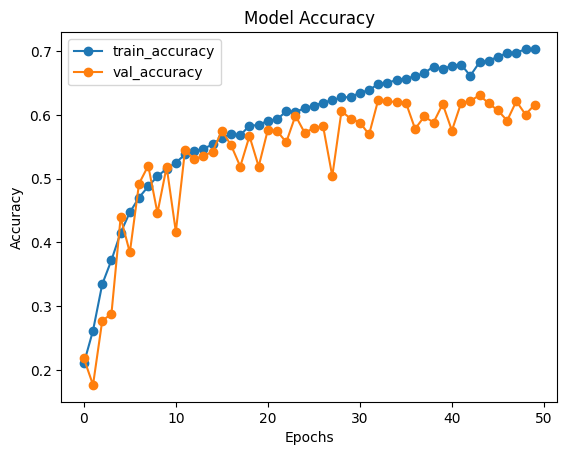

In [25]:
# Plotting model performance
plt.plot(history.history['accuracy'], label='train_accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='val_accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()